In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as pllt

In [2]:
train_df = pd.read_csv("../desktop/train.csv", encoding="latin1")
test_df = pd.read_csv("../desktop/test.csv", encoding="latin1")

# Clean Train

In [3]:
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [4]:
train_df.shape

(40455, 11)

In [5]:
train_df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
train_df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [7]:
train_df.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.796440,61.747166,57.455860,5.727615,5.730717,3.536446,7.782551
std,11678.496907,0.473467,1.433123,2.233779,1.121224,1.143828,0.708732,1.014333
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.853000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.779000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.576000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.843000


In [8]:
train_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Clean Test

In [9]:
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93


In [10]:
test_df.shape

(13485, 10)

In [11]:
test_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# predictions

In [12]:
train_df_corr = train_df.corr()
train_df_corr

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006196,0.001098,-0.008829,-0.007112,-0.006420,-0.007766,-0.006926
carat,-0.006196,1.000000,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
depth,0.001098,0.025089,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,-0.008829,0.182590,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,-0.007112,0.974516,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,-0.006420,0.950563,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,-0.007766,0.947930,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,-0.006926,0.920878,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


In [13]:
train_dum = pd.get_dummies(train_df, drop_first=True)
test_dum = pd.get_dummies(test_df, drop_first=True)

<AxesSubplot:>

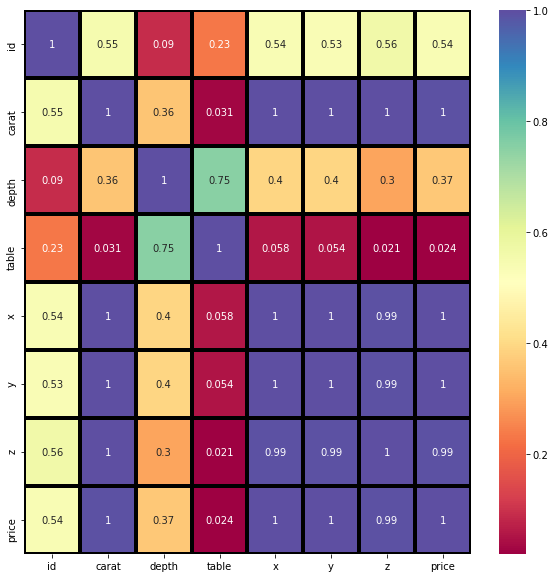

In [14]:
pllt.figure(figsize=(10,10))
sns.heatmap(train_df_corr.corr().abs(), annot=True, cmap= 'Spectral', linewidths=3, linecolor='black')


x, y, z have complete correlation so I drop them.


In [15]:
train_df_corr = train_df_corr.drop(columns = ['x', 'y', 'z'])

<AxesSubplot:>

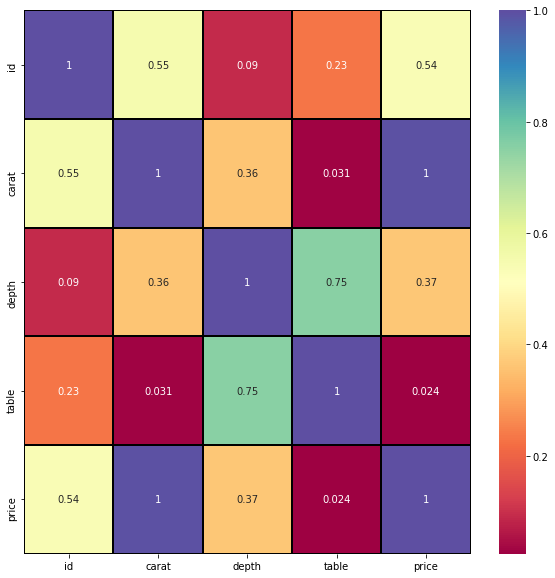

In [16]:
pllt.figure(figsize=(10,10))
sns.heatmap(train_df_corr.corr().abs(), annot=True, cmap= 'Spectral', linewidths=1, linecolor='black')

In [17]:
print(train_df["carat"].unique())
print(train_df["depth"].unique())
print(train_df["table"].unique())

[1.5  2.01 0.5  0.25 0.52 0.44 1.11 0.34 0.29 0.3  1.21 1.04 1.2  0.39
 0.32 0.53 0.51 1.07 0.72 0.8  0.23 0.73 1.76 1.01 0.31 0.66 1.12 0.92
 1.03 1.3  1.15 0.7  1.05 0.82 1.09 1.16 1.   0.35 1.52 0.33 0.36 0.56
 1.25 0.41 1.17 2.25 1.53 0.4  0.77 2.19 0.42 2.04 0.9  2.   1.02 1.62
 1.33 1.14 0.38 1.72 0.81 0.54 0.55 1.13 0.74 1.23 1.74 0.71 1.73 3.01
 1.35 0.65 2.27 0.61 1.6  0.83 1.24 0.62 0.59 1.43 1.28 0.58 0.43 2.22
 1.06 0.6  0.91 1.1  0.87 0.75 2.31 1.51 1.85 0.79 0.76 0.97 1.26 1.75
 1.19 0.57 1.37 0.96 1.59 1.77 0.93 0.37 0.28 1.55 1.08 2.02 1.71 1.29
 1.46 1.65 2.03 0.24 1.22 2.52 1.31 0.27 0.63 1.61 0.46 1.54 0.67 0.84
 0.94 1.67 2.15 1.4  2.29 0.45 1.78 1.45 0.95 0.64 1.58 0.26 2.23 0.99
 2.07 1.18 2.2  2.09 2.51 2.08 0.49 1.64 0.78 2.4  1.44 0.47 2.13 1.56
 1.41 1.69 2.21 1.7  1.42 2.57 2.05 1.27 1.38 2.12 1.83 1.36 0.21 0.86
 1.57 2.1  1.32 2.14 2.65 2.43 2.54 2.18 2.16 2.48 2.06 1.63 1.47 1.39
 0.48 4.13 0.85 2.11 0.69 1.81 2.61 1.34 1.79 2.3  2.53 2.32 2.75 2.28
 0.89 

In [23]:
train_dum.head()

,id,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.50,61.5,58.0,7.32,7.34,4.51,9.588,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.01,60.6,59.0,8.11,8.25,4.96,9.748,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.50,61.6,57.0,5.13,5.09,3.15,7.255,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,0.25,61.6,57.0,4.05,4.08,2.50,6.450,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.52,62.0,55.0,5.16,5.19,3.21,7.721,0,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
test_dum.head()

,id,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.51,58.3,61.9,5.19,5.20,3.04,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1.02,63.0,58.0,6.37,6.43,4.03,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.59,61.9,56.0,5.39,5.34,3.32,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.90,62.3,56.0,6.14,6.18,3.84,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,2.01,60.2,61.0,8.23,8.16,4.93,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [26]:
train_dum.to_csv('data', header=True, index=False)

In [28]:
test_dum.to_csv('FD/test.csv', header=True, index=False)

NotADirectoryError: [Errno 20] Not a directory: 'data/test.csv'

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
X_train = train_dum.drop(columns=['price'], axis=1)
y_train = train_dum['price']

In [20]:
X_test = test_dum.drop(columns=['price'], axis=1)
y_test = test_dum['price']

KeyError: "['price'] not found in axis"

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
print("Coefficient of model :", lr.coef_)

In [ ]:
print("Intercept of model",lr.intercept_)

In [ ]:
predict_train = lr.predict(X_train)
print('price on training data',predict_train) 

In [ ]:
rmse_train = mean_squared_error(y_train,predict_train)
print('RMSE on train dataset : ', rmse_train)

In [ ]:
predict_test = lr.predict(X_test)
print('Price on test data',predict_test)

In [ ]:
rmse_test = mean_squared_error(y_test,predict_test)
print('RMSE on test dataset : ', rmse_test)

### Logistic Reg

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
train_x = train_dum.drop(columns=['price'], axis=1)
train_y = train_dum['price']

In [ ]:
test_x = test_dum.drop(columns=['price'], axis=1)
test_y = test_dum['price']

In [ ]:
test_dum

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(train_x, train_y)